<a href="https://colab.research.google.com/github/Satotite/ARA-P22-microblog/blob/master/Analysedesentiments_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Objectif du projet:**

Dans ce projet, l'idée est de comprendre comment les gens se sentent à propos d'un sujet, d'une marque ou d'un événement en analysant les tweets qu'ils publient. Pour cela, on va utiliser un outil appelé "analyse de sentiment" qui nous aide à déterminer si un tweet est plutôt positif, négatif ou neutre. Cela nous permettra de mieux comprendre les opinions et les attitudes des utilisateurs sur différents sujets.
Outlis et Bibliothèques Utilisées

**pyspark.pngnltk-banner.jpgtéléchargement.png**

**PySpark:**
    PySpark est un outil qui nous permet de traiter un grand nombre de tweets de manière rapide et efficace. C'est comme un super assistant qui nous aide à gérer toutes les données.

**NLTK (Natural Language Toolkit):**
    NLTK nous aide à comprendre et à analyser les mots et les phrases dans les tweets. On peut notamment découper les tweets en mots, les réduire à leur forme de base et même déterminer si leur ton est plutôt positif, négatif ou neutre.

**Matplotlib:**
    Matplotlib est un peu comme notre artiste personnel :) Il nous aide à transformer toutes ces données en jolis graphiques et visualisations. C'est super pour présenter nos résultats de manière claire et intéressante !



**Analyse de Tweets**

In [1]:
!apt-get install openjdk-8-jdk-headless -qq > /dev/null
!wget -q http://archive.apache.org/dist/spark/spark-3.1.1/spark-3.1.1-bin-hadoop3.2.tgz
!tar xf spark-3.1.1-bin-hadoop3.2.tgz
!pip install -q findspark

In [2]:
!pip install pyspark


In [3]:
!pip install nltk

**Pour l'analyse de sentiment on va utiliser VADER:**
> La commande ***!python -m nltk.downloader vader_lexicon*** est utilisée pour télécharger le lexique VADER (Valence Aware Dictionary and sEntiment Reasoner) via la bibliothèque NLTK en Python.
VADER est un lexique spécialisé pour l'analyse des sentiments et particulièrement adapté aux textes des réseaux sociaux.

Score:



*  **neg** : proportion de sentiment négatif.
* **neu**: proportion de sentiment neutre.
* **pos** : proportion de sentiment positif.
* **compound** : score global variant de -1 (très négatif) à +1 (très positif).



In [4]:
!python -m nltk.downloader vader_lexicon

<frozen runpy>:128: RuntimeWarning: 'nltk.downloader' found in sys.modules after import of package 'nltk', but prior to execution of 'nltk.downloader'; this may result in unpredictable behaviour
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


\**Importations de PySpark :**

---




> * col : Fonction pour référencer les colonnes dans un DataFrame PySpark.
* udf : Fonction pour créer des User Defined Functions (UDF) qui permettent d'appliquer des transformations personnalisées sur les colonnes.
* concat_ws : Fonction pour concaténer plusieurs colonnes en une seule chaîne de caractères, avec un séparateur spécifié.
* when : Fonction conditionnelle, similaire à une clause "if-else" pour créer des colonnes basées sur des conditions.


**Importation de nltk**

> * stopwords : Module pour accéder à une liste de mots vides (mots courants qui sont généralement filtrés).
* word_tokenize : Fonction pour diviser une chaîne de texte en mots individuels (tokenisation).
* WordNetLemmatizer : Classe pour lemmatiser des mots, c'est-à-dire réduire les mots à leur forme de base ou à leur lemme.
* re : Module d'expressions régulières pour la manipulation avancée des chaînes de caractères




In [3]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import col, udf
from pyspark.sql.types import FloatType
from pyspark.sql.types import StringType
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer


In [16]:

from pyspark.sql.functions import col, udf, concat_ws, when
from pyspark.sql.types import StringType, ArrayType
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import re

nltk.download('punkt_tab')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('vader_lexicon')


[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [7]:
#importation du fichier avec key API Kaggle

from google.colab import files
#utilisez files.uplead

files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"selmatotite","key":"5e5feeb30542eb3105fe60385cad033a"}'}

In [8]:
#securiser mon fichier
!chmod 600 /content/kaggle.json

In [9]:
#telecharger la dataset :

!kaggle datasets download -d gargmanas/sentimental-analysis-for-tweets

Dataset URL: https://www.kaggle.com/datasets/gargmanas/sentimental-analysis-for-tweets
License(s): GPL-2.0
100% 476k/476k [00:00<00:00, 1.17MB/s]
100% 476k/476k [00:00<00:00, 1.17MB/s]


In [14]:
!unzip sentimental-analysis-for-tweets.zip

Archive:  sentimental-analysis-for-tweets.zip
  inflating: sentiment_tweets3.csv   


In [26]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import col, udf
from pyspark.sql.types import FloatType
from pyspark.sql.types import StringType
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer
spark = SparkSession.builder \
    .appName("SentimentAnalysis") \
    .getOrCreate()

In [27]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import col, udf
from pyspark.sql.types import FloatType
from pyspark.sql.types import StringType
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer

In [8]:
#telecharger la dataset :

!kaggle datasets download -d gargmanas/sentimental-analysis-for-tweets

Dataset URL: https://www.kaggle.com/datasets/gargmanas/sentimental-analysis-for-tweets
License(s): GPL-2.0
100% 476k/476k [00:00<00:00, 647kB/s]
100% 476k/476k [00:00<00:00, 647kB/s]


In [9]:
!unzip sentimental-analysis-for-tweets.zip

Archive:  sentimental-analysis-for-tweets.zip
  inflating: sentiment_tweets3.csv   


In [10]:
# charger les données à partir du fichier CSV tweets (il faut télécharger le fichier avant)
df = spark.read.csv("sentiment_tweets3.csv", header=True, inferSchema=True)
df.show(truncate=False) #pour afficher les chaines completes


+-----+---------------------------------------------------------------------------------------------------------------------------------------+-------------------------+
|Index|message to examine                                                                                                                     |label (depression result)|
+-----+---------------------------------------------------------------------------------------------------------------------------------------+-------------------------+
|106  |just had a real good moment. i missssssssss him so much,                                                                               |0                        |
|217  |is reading manga  http://plurk.com/p/mzp1e                                                                                             |0                        |
|220  |@comeagainjen http://twitpic.com/2y2lx - http://www.youtube.com/watch?v=zoGfqvh2ME8                                                    |0      

In [11]:
def clean_text(text):
    text = re.sub(r'http\S+', '', text)  # remove URLs
    text = re.sub(r'@\w+', '', text)  # remove mentions
    text = re.sub(r'#\w+', '', text)  # remove hashtags
    text = re.sub(r'[^a-zA-Z\s]', '', text)  # remove special characters and numbers
    text = text.lower()  # convert to lowercase
    return text

clean_text_udf = udf(lambda x: clean_text(x), StringType())
df = df.withColumn("clean_text", clean_text_udf(col("message to examine"))) #on va appliquer cette fonction sur la colonne "message to examine"
df.show(truncate=False)


+-----+---------------------------------------------------------------------------------------------------------------------------------------+-------------------------+-------------------------------------------------------------------------------------------------------------------------+
|Index|message to examine                                                                                                                     |label (depression result)|clean_text                                                                                                               |
+-----+---------------------------------------------------------------------------------------------------------------------------------------+-------------------------+-------------------------------------------------------------------------------------------------------------------------+
|106  |just had a real good moment. i missssssssss him so much,                                                             

**Tokenisation**:


> Dans cette étape, on définit une fonction de tokenisation pour diviser le texte nettoyé en mots individuels (tokens). Ensuite, on crée une UDF basée sur cette fonction, l'applique à la colonne clean_text d'un DataFrame PySpark, et on affiche le DataFrame résultant avec la nouvelle colonne tokens (qui contient les listes de tokens)




In [17]:
def tokenize_text(text):
    return word_tokenize(text)

tokenize_udf = udf(lambda x: tokenize_text(x), ArrayType(StringType()))
df = df.withColumn("tokens", tokenize_udf(col("clean_text")))
df.show()


+-----+--------------------+-------------------------+--------------------+--------------------+
|Index|  message to examine|label (depression result)|          clean_text|              tokens|
+-----+--------------------+-------------------------+--------------------+--------------------+
|  106|just had a real g...|                        0|just had a real g...|[just, had, a, re...|
|  217|is reading manga ...|                        0|  is reading manga  |[is, reading, manga]|
|  220|@comeagainjen htt...|                        0|                    |                  []|
|  288|@lapcat Need to s...|                        0| need to send em ...|[need, to, send, ...|
|  540|ADD ME ON MYSPACE...|                        0|add me on myspace...|[add, me, on, mys...|
|  624|so sleepy. good t...|                        0|so sleepy good ti...|[so, sleepy, good...|
|  701|@SilkCharm re: #n...|                        0| re  as someone a...|[re, as, someone,...|
|  808|23 or 24ï¿½C poss...|  

**Lemmatisation**: Exemple:
* "les" devient "le".
* "chats" devient "chat".
* "miaulent" devient "miauler".
* "." reste inchangé.


In [19]:
lemmatizer = WordNetLemmatizer()

def lemmatize_tokens(tokens):
    return [lemmatizer.lemmatize(token) for token in tokens]

lemmatize_udf = udf(lambda x: lemmatize_tokens(x), ArrayType(StringType()))
df = df.withColumn("lemmatized_tokens", lemmatize_udf(col("tokens")))
df.show(truncate=False)


+-----+---------------------------------------------------------------------------------------------------------------------------------------+-------------------------+-------------------------------------------------------------------------------------------------------------------------+---------------------------------------------------------------------------------------------------------------------------------------------+-------------------------------------------------------------------------------------------------------------------------------------------+
|Index|message to examine                                                                                                                     |label (depression result)|clean_text                                                                                                               |tokens                                                                                                                                 

In [20]:
df = df.withColumn("lemmatized_tokens_str", concat_ws(" ", col("tokens")))
df.show(truncate=False)


+-----+---------------------------------------------------------------------------------------------------------------------------------------+-------------------------+-------------------------------------------------------------------------------------------------------------------------+---------------------------------------------------------------------------------------------------------------------------------------------+-------------------------------------------------------------------------------------------------------------------------------------------+-----------------------------------------------------------------------------------------------------------------------+
|Index|message to examine                                                                                                                     |label (depression result)|clean_text                                                                                                               |tokens         

**Analyse de sentiment:**


> get_sentiment(text) : C'est une fonction qui prend du texte en entrée et renvoie un score de sentiment. Ici, le score renvoyé est le score composite (compound) qui varie de -1 (très négatif) à +1 (très positif).



In [31]:

sia = SentimentIntensityAnalyzer()

def get_sentiment(text):
    scores = sia.polarity_scores(text)
    return scores['compound']

get_sentiment_udf = udf(lambda x: get_sentiment(x), FloatType())


In [32]:
df = df.withColumn("sentiment", get_sentiment_udf(col("lemmatized_tokens_str")))
df.show(truncate=False)


+-----+---------------------------------------------------------------------------------------------------------------------------------------+-------------------------+-------------------------------------------------------------------------------------------------------------------------+---------------------------------------------------------------------------------------------------------------------------------------------+-------------------------------------------------------------------------------------------------------------------------------------------+-----------------------------------------------------------------------------------------------------------------------+---------+
|Index|message to examine                                                                                                                     |label (depression result)|clean_text                                                                                                               |token

**Définir les scores de sentiments**:


> si sentiment > 0.5 --> positive

> si sentiment < 0.5 --> négatif

> sinon neutre








In [44]:
df = df.withColumn(
    "sentiment_label",
    when(col("sentiment") > 0.05, "positive")
    .when(col("sentiment") < -0.05, "negative")
    .otherwise("neutral")
)

df.show(truncate=False)

+-----+---------------------------------------------------------------------------------------------------------------------------------------+-------------------------+-------------------------------------------------------------------------------------------------------------------------+---------------------------------------------------------------------------------------------------------------------------------------------+-------------------------------------------------------------------------------------------------------------------------------------------+-----------------------------------------------------------------------------------------------------------------------+---------+---------------+
|Index|message to examine                                                                                                                     |label (depression result)|clean_text                                                                                                     

Étapes suivantes :

In [34]:
from pyspark.sql.functions import count

# on peut compter le nombre de tweets pour chaque sentiment
sentiment_counts = df.groupBy("sentiment_label").count()
sentiment_counts.show()


+---------------+-----+
|sentiment_label|count|
+---------------+-----+
|       positive| 5420|
|        neutral| 2314|
|       negative| 2580|
+---------------+-----+



\**Visualisations des résultats**: Je vous laisse découvrir :)

In [35]:
# Premièrement, on doit convertir le DataFrame Spark en DataFrame Pandas pour les insights
sentiment_counts_pd = sentiment_counts.toPandas()


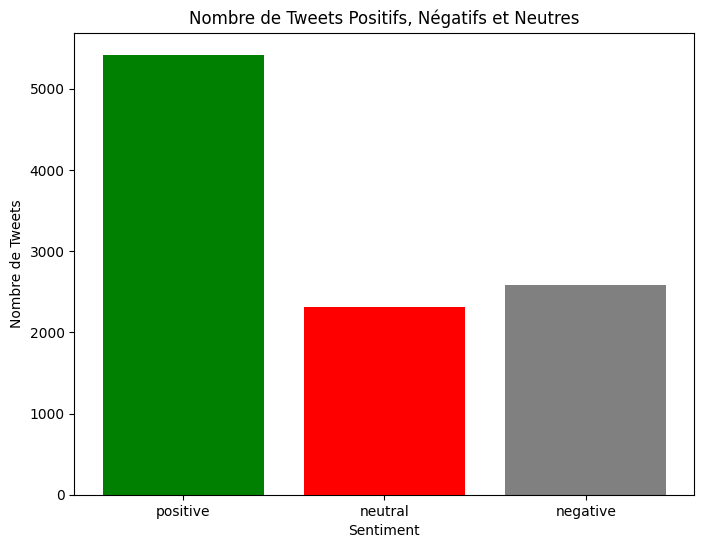

In [36]:
import matplotlib.pyplot as plt

# Labels: définir les labels et les valeurs
labels = sentiment_counts_pd['sentiment_label']
values = sentiment_counts_pd['count']

# créer le graphique à barres
plt.figure(figsize=(8, 6))
plt.bar(labels, values, color=['green', 'red', 'gray'])
plt.xlabel('Sentiment')
plt.ylabel('Nombre de Tweets')
plt.title('Nombre de Tweets Positifs, Négatifs et Neutres')
plt.show()


Nuage de mots :)

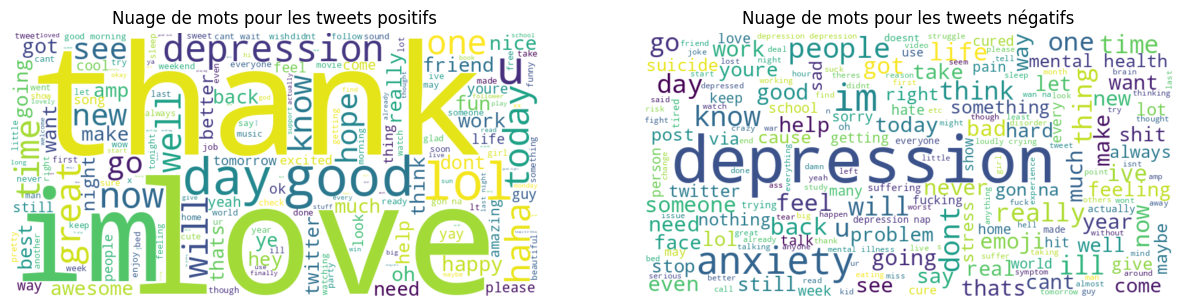

In [37]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Filtrer les tweets positifs et négatifs
positive_tweets = df.filter(df.sentiment_label == "positive").select("lemmatized_tokens_str").rdd.flatMap(lambda x: x).collect()
negative_tweets = df.filter(df.sentiment_label == "negative").select("lemmatized_tokens_str").rdd.flatMap(lambda x: x).collect()

positive_text = " ".join(positive_tweets)
negative_text = " ".join(negative_tweets)

# Générer les nuages de mots
wordcloud_positive = WordCloud(width=800, height=400, background_color='white').generate(positive_text)
wordcloud_negative = WordCloud(width=800, height=400, background_color='white').generate(negative_text)

# Visualiser les nuages de mots
plt.figure(figsize=(15, 8))

plt.subplot(1, 2, 1)
plt.imshow(wordcloud_positive, interpolation='bilinear')
plt.title('Nuage de mots pour les tweets positifs')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(wordcloud_negative, interpolation='bilinear')
plt.title('Nuage de mots pour les tweets négatifs')
plt.axis('off')

plt.show()


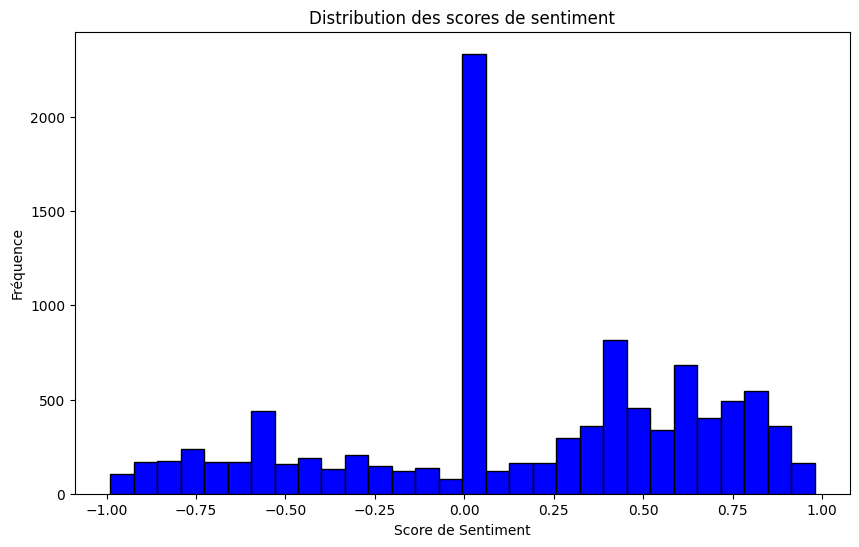

In [38]:
# Convertir en Pandas DataFrame
sentiment_scores_pd = df.select("sentiment").toPandas()

# Créer un histogramme des scores de sentiment
plt.figure(figsize=(10, 6))
plt.hist(sentiment_scores_pd['sentiment'], bins=30, color='blue', edgecolor='black')
plt.xlabel('Score de Sentiment')
plt.ylabel('Fréquence')
plt.title('Distribution des scores de sentiment')
plt.show()


<ipython-input-39-17661b4773a6>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='sentiment_label', y='sentiment', data=sentiment_data_pd, palette=['green', 'red', 'gray'])


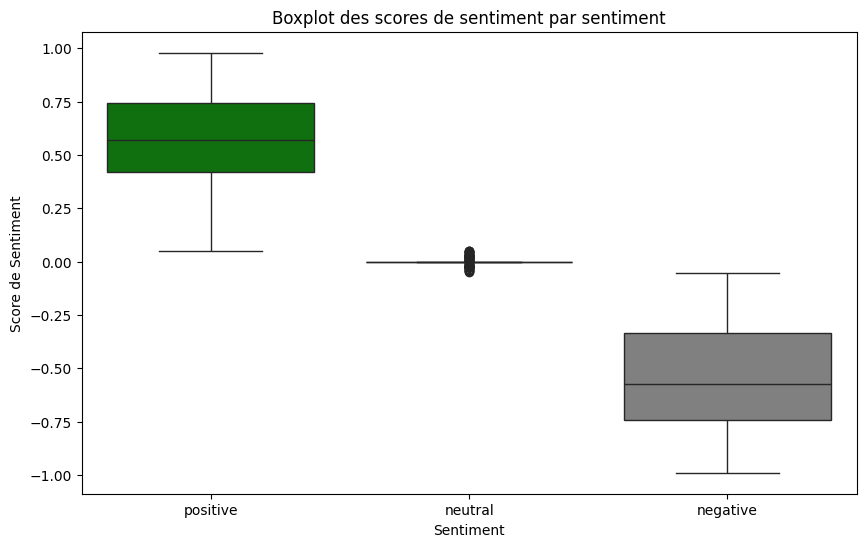

In [39]:
# Convertir en Pandas DataFrame
sentiment_data_pd = df.select("sentiment", "sentiment_label").toPandas()

# Créer le boxplot
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.boxplot(x='sentiment_label', y='sentiment', data=sentiment_data_pd, palette=['green', 'red', 'gray'])
plt.xlabel('Sentiment')
plt.ylabel('Score de Sentiment')
plt.title('Boxplot des scores de sentiment par sentiment')
plt.show()


+---------------+-----+
|sentiment_label|count|
+---------------+-----+
|       positive| 5420|
|        neutral| 2314|
|       negative| 2580|
+---------------+-----+



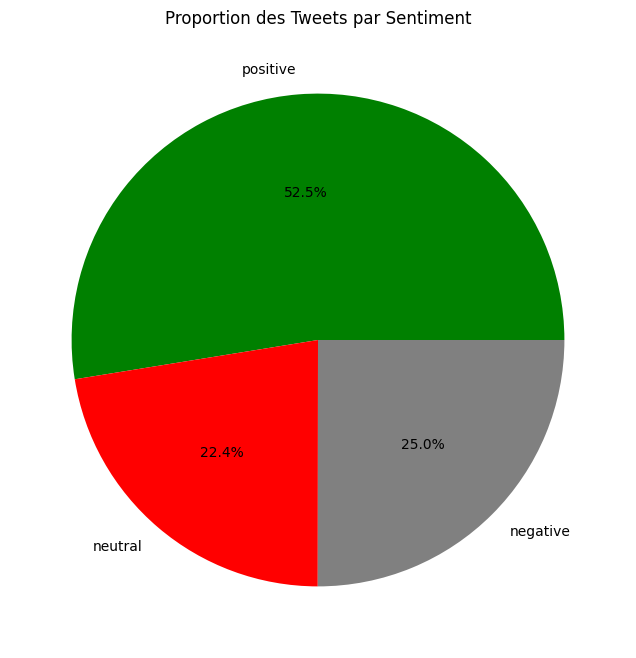

In [40]:
# Compter le nombre de tweets pour chaque sentiment
sentiment_counts = df.groupBy("sentiment_label").count()
sentiment_counts.show()

# Convertir le DataFrame Spark en DataFrame Pandas
sentiment_counts_pd = sentiment_counts.toPandas()

# Créer le diagramme circulaire
plt.figure(figsize=(8, 8))
plt.pie(sentiment_counts_pd['count'], labels=sentiment_counts_pd['sentiment_label'], autopct='%1.1f%%', colors=['green', 'red', 'gray'])
plt.title('Proportion des Tweets par Sentiment')
plt.show()
